# Analyse et Exploration des Données
## EDA


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# (info();	head();	shape();	duplicated();	describe();	values_counts())

#Loading Data
Current_Path=os.getcwd()

csv_path = os.path.join(Current_Path,"..","Data","DataSetFile_Livraison.csv")
Data_File=pd.read_csv(csv_path)
print("===== Data ======")
print(Data_File)

print("===== Infos Generales ======")
Data_File.info()

print("===== Début Data_File ======")
print(Data_File.head())

print("===== Dimensions ======")
print(Data_File.shape)

print("===== Doublons ======")
Data_File.duplicated()

print("===== Description ======")
print(Data_File.describe())

#print("===== Comptage ======")
#print(Data_File.values_counts())


===== Data ======
     Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0         522         7.93   Windy           Low   Afternoon      Scooter   
1         738        16.42   Clear        Medium     Evening         Bike   
2         741         9.52   Foggy           Low       Night      Scooter   
3         661         7.44   Rainy        Medium   Afternoon      Scooter   
4         412        19.03   Clear           Low     Morning         Bike   
..        ...          ...     ...           ...         ...          ...   
995       107         8.50   Clear          High     Evening          Car   
996       271        16.28   Rainy           Low     Morning      Scooter   
997       861        15.62   Snowy          High     Evening      Scooter   
998       436        14.17   Clear           Low   Afternoon         Bike   
999       103         6.63   Foggy           Low       Night      Scooter   

     Preparation_Time_min  Courier_Experience_yrs  Delive

## Heatmap de corrélation des variables numériques

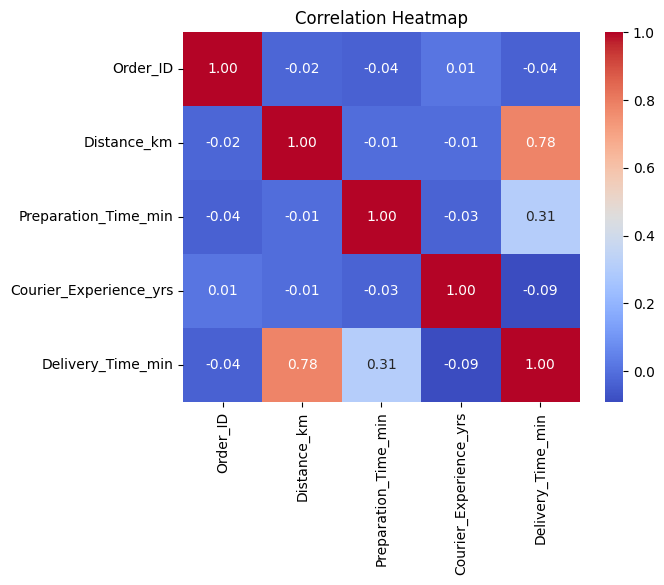

In [14]:
#import os
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data_File_Num = Data_File.select_dtypes(np.number)
#Data_File_Num.removes()
sns.heatmap(Data_File_Num.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

## Visualisations - Par rapport à la variable Traget (ciblée)

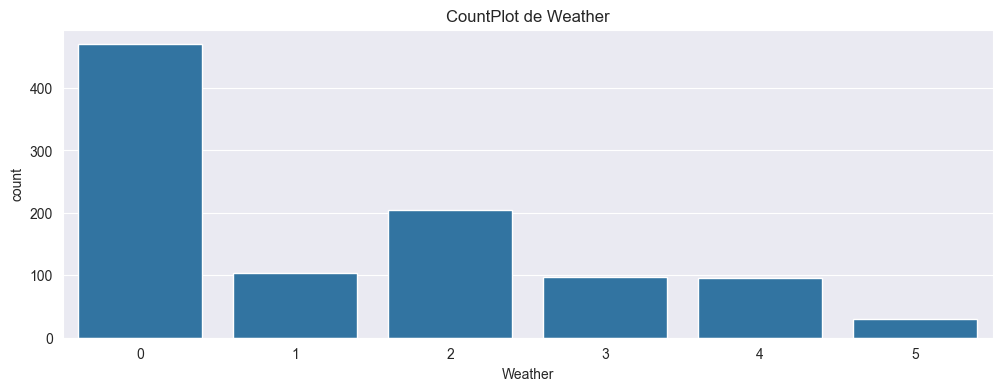

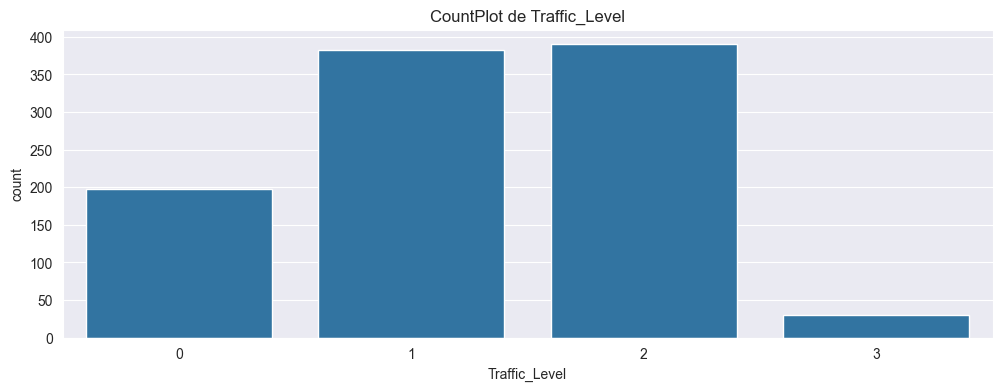

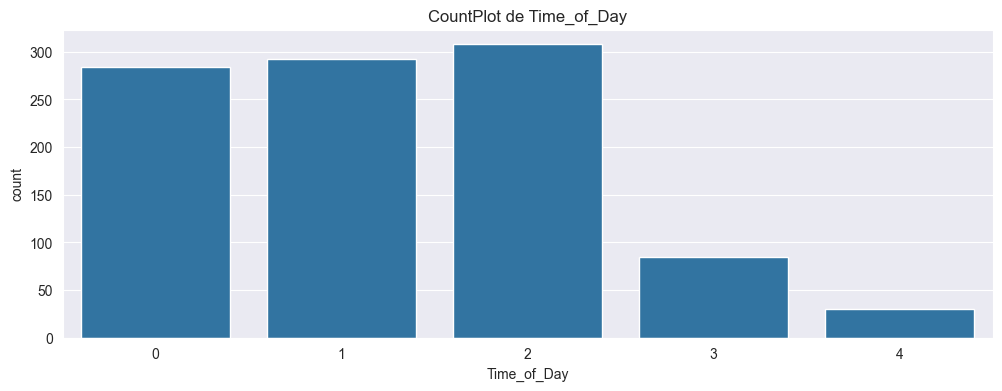

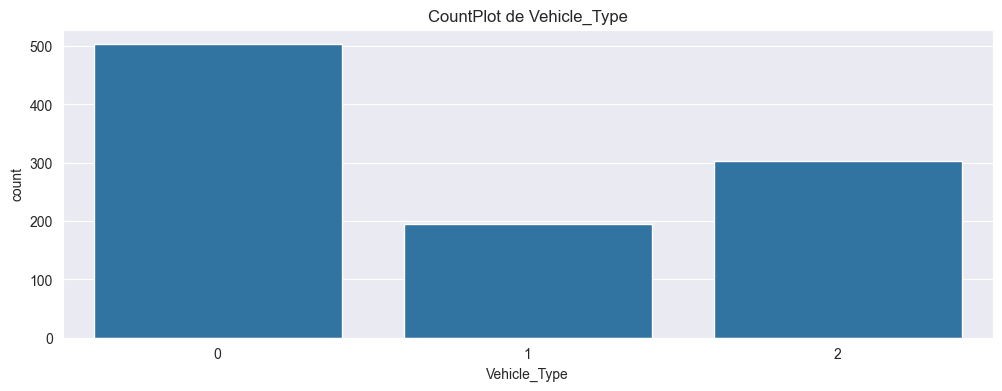

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

Current_Path=os.getcwd()

csv_path = os.path.join(Current_Path,"..","Data","DataSetFile_Livraison.csv")
Data_File=pd.read_csv(csv_path)

# Data_File_Num = Data_File.drop(columns='')
Data_File_Obj=Data_File.select_dtypes(include=['object'])


le=LabelEncoder()
for item in Data_File_Obj:
    Data_File[item]=le.fit_transform(Data_File[item])

for col_Obj in Data_File_Obj:
    plt.figure(figsize=(12,4))
    sns.countplot(x=col_Obj, data=Data_File)
    plt.title(f"CountPlot de {col_Obj}")
    plt.show()

#Data_File["Churn"]=le.fit_transfrom(Data_File['Churn'])


## Boxplots pour analyser la relation entre la cible et les variables catégorielles
### (ex : trafic vs temps de livraison)

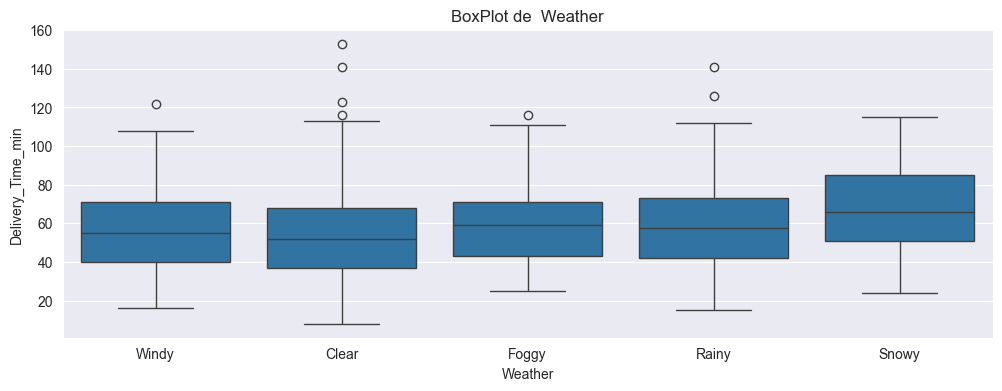

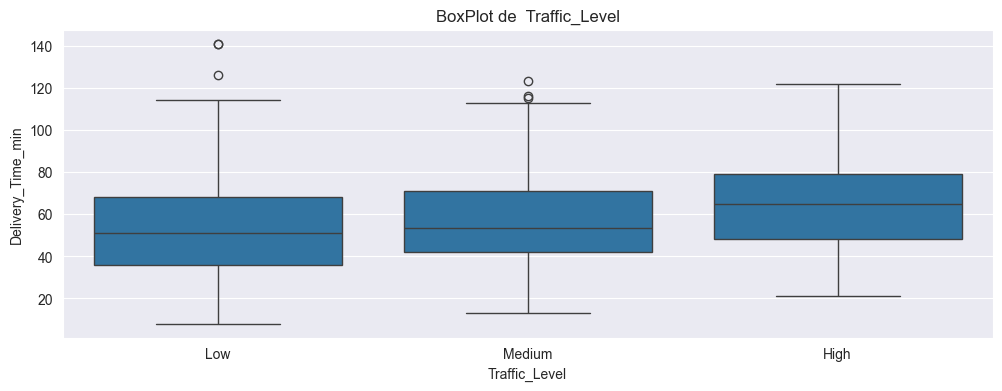

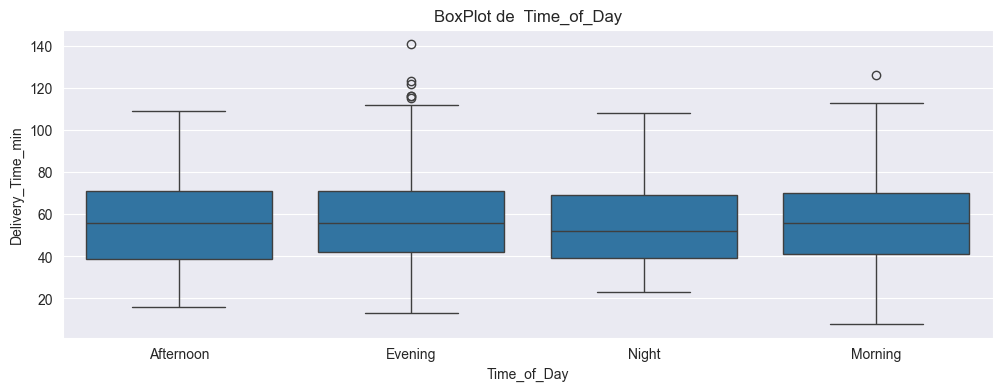

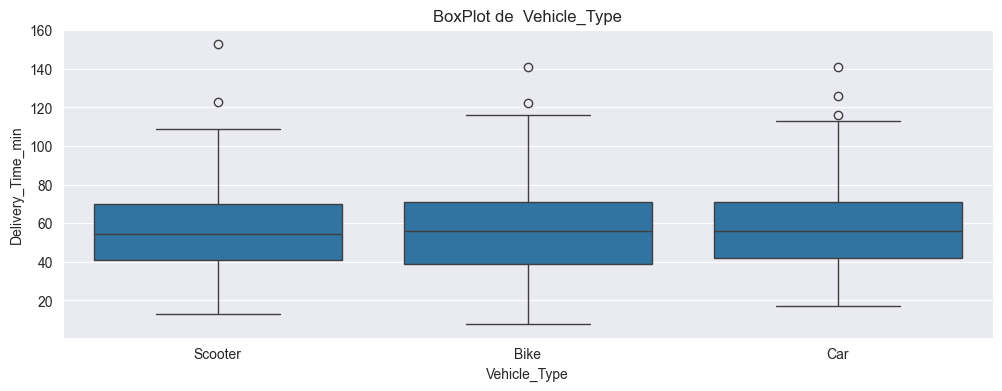

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

#loading data
Current_Path=os.getcwd()
csv_path = os.path.join(Current_Path,"..","Data","DataSetFile_Livraison.csv")
Data_File=pd.read_csv(csv_path)

Data_File_Obj=Data_File.select_dtypes(include=['object'])

for item in Data_File_Obj:
    plt.figure(figsize=(12,4))
    sns.boxplot(data=Data_File, x=item,y ='Delivery_Time_min')
    plt.title(f"BoxPlot de  {item}")
    plt.ylabel("Delivery_Time_min")
    plt.show()


### Analyse de la distribution de la variable cible

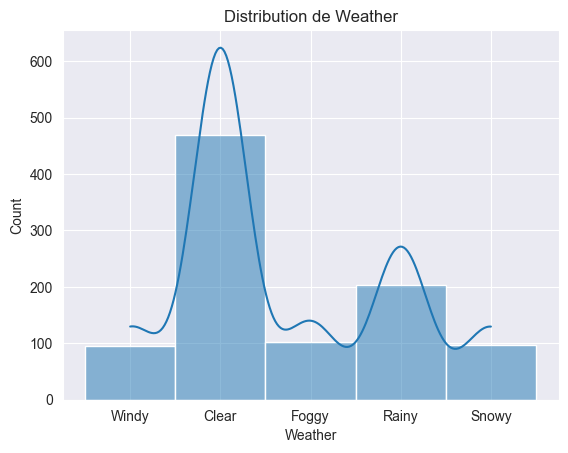

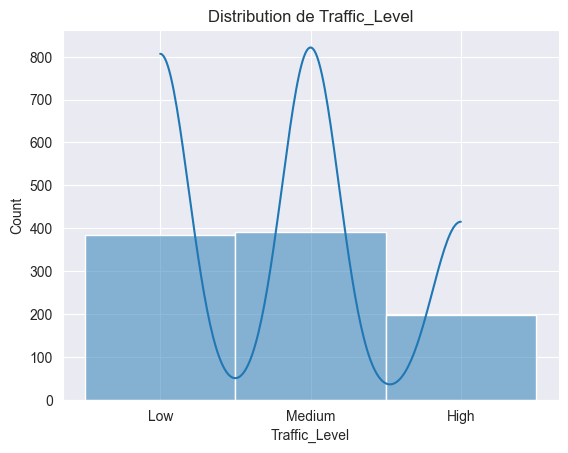

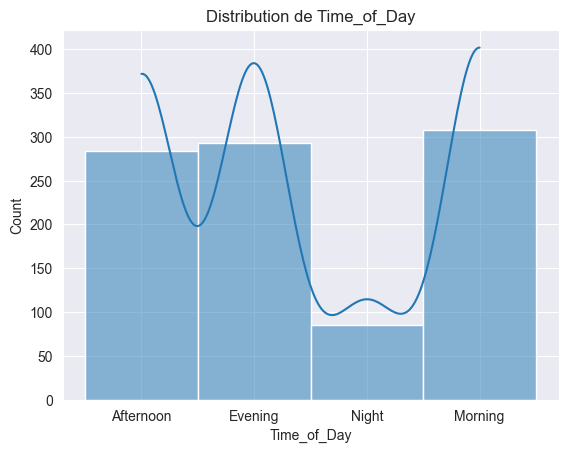

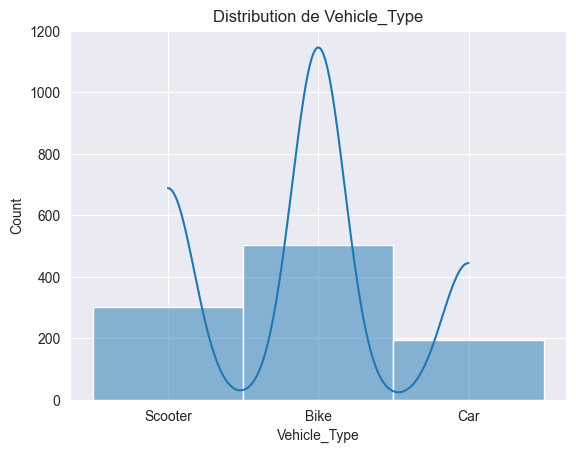

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading data
Current_Path=os.getcwd()
csv_path = os.path.join(Current_Path,"..","Data","DataSetFile_Livraison.csv")
Data_File=pd.read_csv(csv_path)

Data_File_Obj=Data_File.select_dtypes(include=['object'])

for item in Data_File_Obj:
    sns.histplot(Data_File[item], kde=True)
    plt.title(f"Distribution de {item}")
    plt.show()


## Prétraitement
### (StandardScaler pour numérique)

In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import os
import pandas as pd

#loading data
Current_Path=os.getcwd()
csv_path = os.path.join(Current_Path,"..","Data","DataSetFile_Livraison.csv")
Data_File=pd.read_csv(csv_path)
Data_File_Num=Data_File.select_dtypes(np.number)

scaler = StandardScaler()
scaled_data=scaler.fit_transform(Data_File_Num)
print(scaled_data)

[[ 0.07447822 -0.37408542 -0.69185319 -1.22880708 -0.6224876 ]
 [ 0.82272454  1.11700846  0.41911139 -0.88550556  1.2360903 ]
 [ 0.83311685 -0.09483462  1.53007597 -1.22880708  0.10281109]
 ...
 [ 1.24880926  0.97650491  1.25233482 -0.88550556  1.10009679]
 [-0.22343467  0.72184224 -1.24733548 -1.5721086  -0.07851358]
 [-1.37698108 -0.60240368  0.97459368 -0.54220405  0.05747992]]


### OneHotEncoder pour catégoriel

In [13]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import os
import pandas as pd
#loading data
Current_Path=os.getcwd()
csv_path = os.path.join(Current_Path,"..","Data","DataSetFile_Livraison.csv")
Data_File=pd.read_csv(csv_path)
Data_File_Obj=Data_File.select_dtypes(['object'])

encoder = OneHotEncoder(sparse_output=False)
encoder_data=encoder.fit_transform(Data_File_Obj)
print(encoder_data)


[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]]


## Sélection de features
### (SelectKBest : Test statistique f_regression)

In [24]:
# %% Imports nécessaires
import os
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Chargement des données
Current_Path = os.getcwd()
csv_path = os.path.join(Current_Path, "..", "Data", "DataSetFile_Livraison.csv")
Data_File = pd.read_csv(csv_path)


# Préparation des données

Data_File_Obj = Data_File.select_dtypes(include=["object"])

# Créer la cible (Y) - la variable num à prédire
Y = Data_File['Delivery_Time_min']

# Créer les features (X) en encodant les colonnes catégorielles
# pd.get_dummies() : la manière la plus simple de faire du One-Hot Encoding
# Il retourne directement un DataFrame avec les bons noms de colonnes.
X = pd.get_dummies(Data_File_Obj, drop_first=True)


# Sélection des meilleures features

# Initialiser SelectKBest pour trouver les 2 meilleures features
# On utilise f_regression car la cible Y est numérique
selector = SelectKBest(score_func=f_regression, k=2)

# Entraîner le sélecteur
selector.fit(X, Y)

# Afficher les résultats

# Récupérer les noms des colonnes sélectionnées
# Cela fonctionne directement car X est un DataFrame avec des noms de colonnes
selected_features = selector.get_feature_names_out()

print(f"Les 2 meilleures features sont : {list(selected_features)}")

Les 2 meilleures features sont : ['Weather_Snowy', 'Traffic_Level_Low']


## Modélisation avec GridSearchCV